In [47]:
import pandas as pd 
import numpy as np    
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV,mutual_info_regression
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA    
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
import lightgbm as lgbm   
from sklearn.pipeline import Pipeline  
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV              
import matplotlib.pyplot as plt             
import seaborn as sn 
from collections import OrderedDict        
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestClassifier      
import itertools    

import keras
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical     
from keras.layers import Dense,Dropout,Input
from keras.callbacks import ReduceLROnPlateau,EarlyStopping
from keras.models import Model
from keras.activations import relu
from keras.callbacks import History 
from keras.utils.vis_utils import plot_model
from tensorflow.keras.optimizers import Adam      
from sklearn import preprocessing    
from keras.models import Sequential      
from keras import layers             

from xgboost import XGBClassifier   
from sklearn.svm import SVC         
from sklearn.naive_bayes import GaussianNB  
from sklearn.naive_bayes import MultinomialNB 
from sklearn.preprocessing import MinMaxScaler 
from sklearn import metrics   
import sklearn 


In [ ]:
data_df = pd.read_csv('/music_data_features.csv') 
labels = data_df['label']       
data_df.shape                   

(1000, 188)

In [ ]:
genres = {'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 
          'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}      

In [ ]:
from sklearn.model_selection import train_test_split 
X = data_df
y = labels    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0 , stratify=y)              
                        

In [ ]:
X_train['label'].value_counts()    , X_test['label'].value_counts()        

(9    90
 7    90
 8    90
 0    90
 4    90
 5    90
 2    90
 1    90
 3    90
 6    90
 Name: label, dtype: int64, 0    10
 4    10
 6    10
 7    10
 3    10
 5    10
 8    10
 2    10
 9    10
 1    10
 Name: label, dtype: int64)

In [ ]:
X_train = X_train.drop('label' , axis = 1 )  
X_test = X_test.drop('label' , axis = 1 )     
X_train.shape  , X_test.shape              

((900, 187), (100, 187))

In [ ]:
y_train.shape 

(900,)

In [ ]:
## Scaling the data 
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test) 
X_train_sc.shape , X_test.shape  , X_train.shape , X_test.shape                

((900, 187), (100, 187), (900, 187), (100, 187))

In [ ]:
def plot_confusion_matrix(cm, classes,
                          title ,  
                          cmap=plt.cm.Oranges):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45,fontsize=15)
    plt.yticks(tick_marks, classes,fontsize=15)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Predicted label',fontsize=20,fontweight="bold")     
    plt.xlabel('True label',fontsize=20,fontweight="bold")    
    plt.title('Confusion matrix ' + title  ,fontsize=20,fontweight="bold")       

## XGBoost 

In [ ]:
## Parameter tuning 

clf = XGBClassifier()   

param_grid = {   
        'max_depth': [6, 10, 15, 20],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],      
        'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],    
        'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        'gamma': [0, 0.25, 0.5, 1.0],
        'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
        'n_estimators': [100]}           

rs_clf = RandomizedSearchCV(clf, param_grid, n_iter=20,
                            n_jobs=1, verbose=2, cv=2,
                            scoring='accuracy', refit=True, random_state=42)
print("Randomized search..")
rs_clf.fit(X_train_sc , y_train) 
            

best_score = rs_clf.best_score_
best_params = rs_clf.best_params_
# print("Best score: {}".format(best_score))
print("Best params: ")
for param_name in sorted(best_params.keys()):
    print('%s: %r' % (param_name, best_params[param_name]))                          

Randomized search..
Fitting 2 folds for each of 20 candidates, totalling 40 fits
[CV] END colsample_bylevel=0.4, colsample_bytree=0.9, gamma=1.0, learning_rate=0.2, max_depth=6, min_child_weight=5.0, n_estimators=100, reg_lambda=50.0, subsample=0.7; total time=   1.7s
[CV] END colsample_bylevel=0.4, colsample_bytree=0.9, gamma=1.0, learning_rate=0.2, max_depth=6, min_child_weight=5.0, n_estimators=100, reg_lambda=50.0, subsample=0.7; total time=   1.9s
[CV] END colsample_bylevel=0.8, colsample_bytree=0.8, gamma=0.25, learning_rate=0.1, max_depth=20, min_child_weight=1.0, n_estimators=100, reg_lambda=1.0, subsample=0.6; total time=   5.0s
[CV] END colsample_bylevel=0.8, colsample_bytree=0.8, gamma=0.25, learning_rate=0.1, max_depth=20, min_child_weight=1.0, n_estimators=100, reg_lambda=1.0, subsample=0.6; total time=   5.8s
[CV] END colsample_bylevel=0.4, colsample_bytree=1.0, gamma=0.25, learning_rate=0.1, max_depth=15, min_child_weight=7.0, n_estimators=100, reg_lambda=50.0, subsample

In [ ]:
clf = XGBClassifier(**best_params)              

clf.fit(X_train_sc ,y_train,eval_metric='merror')                  
     
y_pred = clf.predict(X_test_sc )                                                       
       
print('Testing accuracy : {:.2f} % ' .format(accuracy_score(y_test,y_pred )*100))    
print('Testing:\n {classification_report(y_test, y_pred_test) }')                                

Testing accuracy : 82.00 % 
Testing:
 {classification_report(y_test, y_pred_test) }


Text(0.5, 1.0, 'Feature Importance (XGBoost)')

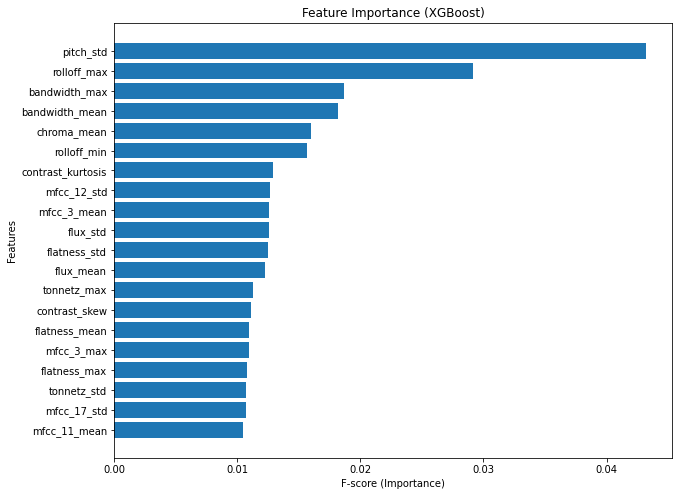

In [ ]:
## Feature performance 

sorted_indx = clf.feature_importances_.argsort()[::-1]   
imp_f = clf.feature_importances_                
feat_imp = {} 
feat = []
imp = [] 

for i in range(20):  
  feature = X.columns[sorted_indx[i]]   
  impoer =  imp_f[sorted_indx[i]]  
  feat.append(feature) 
  imp.append(impoer)  

plt.figure(figsize=(10,8))    
plt.barh(feat[::-1] , imp[::-1] )       
plt.xlabel('F-score (Importance)')  
plt.ylabel('Features') 
plt.title('Feature Importance (XGBoost)')  

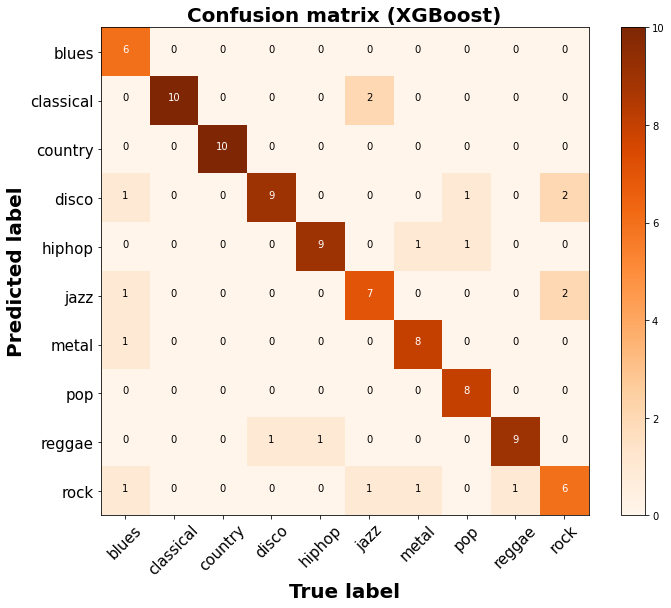

In [ ]:
## Plotting confusion matrix 

cm = confusion_matrix(y_pred,y_test)    
keys = OrderedDict(sorted(genres.items(), key=lambda t: t[1])).keys()   
plt.figure(figsize=(10,8))       
plot_confusion_matrix(cm, keys , '(XGBoost)'  )                                                 

## Random Forest 

In [45]:
rfc=RandomForestClassifier(random_state=0) 

param_grid = { 
    'n_estimators': [500],
    'max_features': ['auto', 'sqrt', 'log2'],                   
    'max_depth' : [5,6,7,8],
    'criterion' :['gini', 'entropy']      
} 

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train_sc , y_train)

y_pred = CV_rfc.predict(X_test_sc) 
   
CV_rfc.best_params_              

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [46]:
classifier = RandomForestClassifier(**CV_rfc.best_params_ )  
classifier.fit(X_train_sc ,y_train)              

y_pred = classifier.predict(X_test_sc)        
print("Testing accuracy : {:.2f} %" .format(accuracy_score(y_pred , y_test )*100) )    

Testing accuracy : 71.00 %


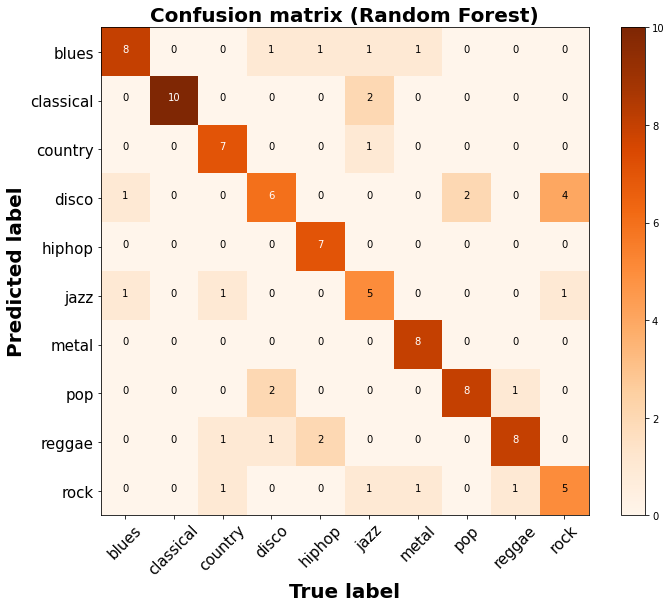

In [ ]:
## Plotting confusion matrix 

cm = confusion_matrix(y_pred,y_test)
keys = OrderedDict(sorted(genres.items(), key=lambda t: t[1])).keys()
plt.figure(figsize=(10,8))    
plot_confusion_matrix(cm, keys , '(Random Forest)'  )                                       

## KNN 

In [ ]:
# Apllying GridSearchCV to find the best k value
grid_params = {
    "n_neighbors": [1,3,5,7,9,11,13,15,17],
    "weights": ["uniform"],
    "metric": ["euclidean", "manhattan"]           
}

grid_knn = GridSearchCV(KNeighborsClassifier(), grid_params, verbose=1,cv=5,n_jobs=-1)           

grid_knn.fit(X_train_sc , y_train)          
knn_pred = grid_knn.predict(X_test_sc )                                        
print("Test set accuracy: {:.2f} %".format(accuracy_score(y_test, knn_pred)*100  ))       
print('Best n_neighbors:', grid_knn.best_estimator_.get_params()['n_neighbors'])          
            

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Test set accuracy: 72.00 %
Best n_neighbors: 5


In [ ]:
estimator_knn = KNeighborsClassifier(algorithm='auto') 
parameters_knn = {
    'n_neighbors': (1,10, 1),
    'leaf_size': (20,40,1),
    'p': (1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev') }      

grid_search_knn = GridSearchCV(
    estimator=estimator_knn,
    param_grid=parameters_knn,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5  
)   
KNN_1 = grid_search_knn.fit(X_train_sc , y_train)   
y_pred_ =KNN_1.predict(X_test_sc )  
print("Test set accuracy: {:.2f} %".format(accuracy_score(y_test, y_pred_ )*100  ))              

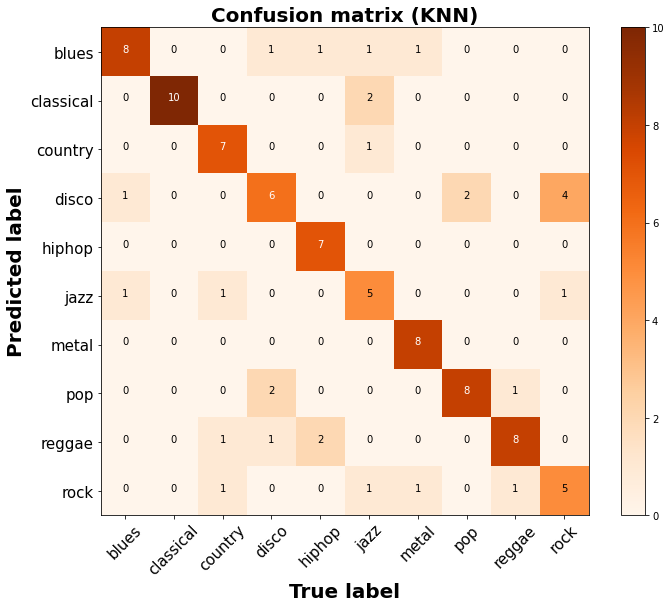

In [ ]:
## Plotting confusion matrix 

cm = confusion_matrix(y_pred,y_test)
keys = OrderedDict(sorted(genres.items(), key=lambda t: t[1])).keys()
plt.figure(figsize=(10,8))    
plot_confusion_matrix(cm, keys  , "(KNN)" )                                        

## DNN

In [ ]:
X_train_nn , X_valid , y_train_nn, y_valid = train_test_split( X_train_sc , y_train , test_size=0.1, random_state=0 , stratify= y_train )        
X_train_nn.shape , X_valid.shape , y_train_nn.shape , y_valid.shape         

((810, 187), (90, 187), (810,), (90,))

In [ ]:
y_train_nn=to_categorical(y_train_nn,10,'int')  
y_valid_nn=to_categorical(y_valid,10,'int')   
y_test_nn=to_categorical(y_test ,10,'int')
y_train.shape , y_test.shape , y_valid_nn.shape              

((900,), (100,), (90, 10))

In [50]:
np.random.seed(0)  

model = Sequential()             
 
input_size = X_train.shape[1]                  
model.add(Dense(500, input_dim= input_size , activation='relu'))     
model.add(Dense(1000, activation='relu'))         
model.add(Dense(1000, activation='relu')) 
model.add(Dense(500, activation='relu')) 
model.add(Dense(500, activation='relu')) 
model.add(Dense(200, activation='relu')) 
## 10 output neurons        
model.add(Dense( 10 , activation='softmax'))    

model.summary()    

model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])           
 
epochs = 200        

es=EarlyStopping(monitor='val_loss',patience= 10 ,verbose= 1 )                   

history = model.fit(X_train_nn , y_train_nn , validation_data=(X_valid, y_valid_nn ) , callbacks=[es] ,  epochs = 100 , verbose = 0   )        
                 

loss, acc = model.evaluate( X_test_sc , y_test_nn  )    
print("\nTest accuracy : %.1f%%" % (100.0 * acc))         


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 500)               94000     
                                                                 
 dense_15 (Dense)            (None, 1000)              501000    
                                                                 
 dense_16 (Dense)            (None, 1000)              1001000   
                                                                 
 dense_17 (Dense)            (None, 500)               500500    
                                                                 
 dense_18 (Dense)            (None, 500)               250500    
                                                                 
 dense_19 (Dense)            (None, 200)               100200    
                                                                 
 dense_20 (Dense)            (None, 10)               

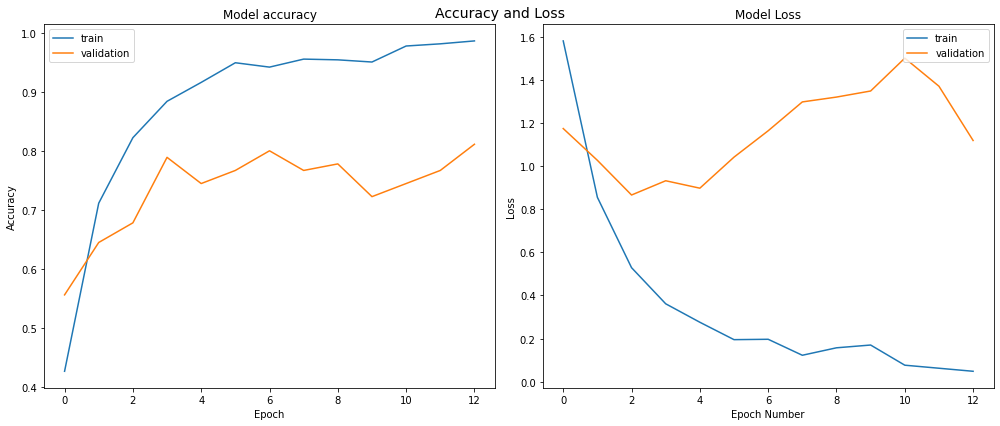

In [51]:
figure = plt.figure(figsize=(14,6))
figure.suptitle('Accuracy and Loss', fontsize = 14)
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch Number')
plt.legend(['train', 'validation'], loc='upper right')
figure.tight_layout()
plt.show()    

In [52]:
y_pred = model.predict(X_test_sc)    
pred = y_pred.argmax(axis = 1)           

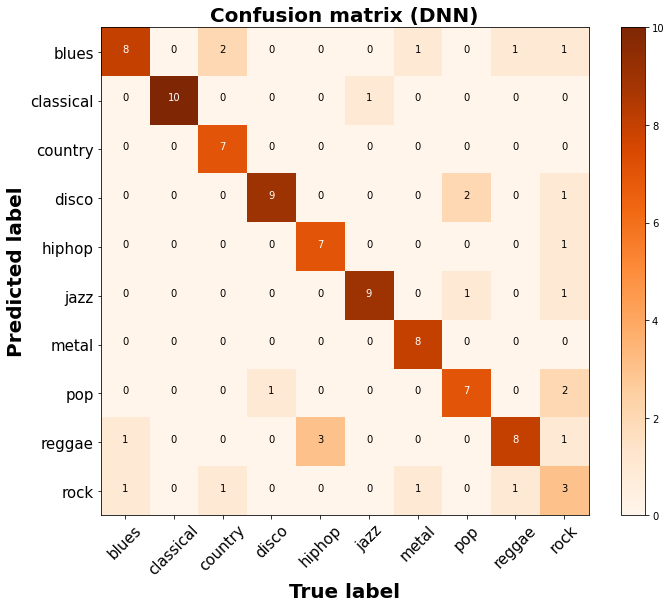

In [53]:
## Plotting confusion matrix 

cm = confusion_matrix(pred,y_test)  
keys = OrderedDict(sorted(genres.items(), key=lambda t: t[1])).keys()
plt.figure(figsize=(10,8))      
plot_confusion_matrix(cm, keys  , "(DNN)" )                                               

## SVM 

In [54]:
param_grid = {'C':[0.1,1,10,100,1000],'kernel':['linear','poly','rbf','sigmoid'],'degree':[1,2,3,4,5,6]}
grid = GridSearchCV(SVC(),param_grid) 
grid.fit(X_train_sc,y_train)    
y_pred = grid.predict(X_test_sc)   

In [55]:
print("Testing accuracy for SVM : {:.2f} %" .format(accuracy_score(y_pred , y_test )*100) )      
print(grid.best_params_)     

Testing accuracy for SVM : 84.00 %
{'C': 10, 'degree': 1, 'kernel': 'rbf'}


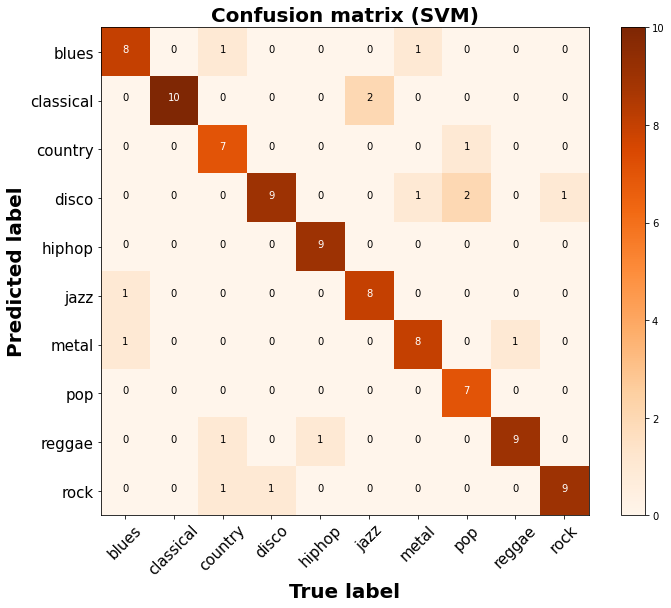

In [56]:
## Plotting confusion matrix 

cm = confusion_matrix(y_pred,y_test)
keys = OrderedDict(sorted(genres.items(), key=lambda t: t[1])).keys()
plt.figure(figsize=(10,8))      
plot_confusion_matrix(cm, keys  , "(SVM)" )                                                 

In [57]:
y_pred.shape 
y_test.shape 

(100,)

## Naive Bayes  

In [58]:
scaler = MinMaxScaler()
X_train_mm = scaler.fit_transform(X_train)
X_test_mm  = scaler.transform(X_test)        

Testing accuracy for Gaussian Naive bayes : 61.0 %


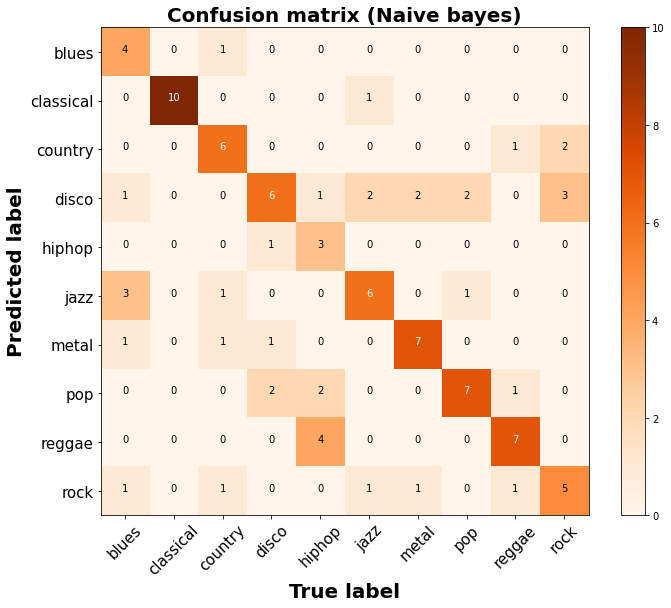

In [59]:
# Naive bayes 

Gmodel=GaussianNB()
Gmodel.fit(  X_train_mm  , y_train )     
test_Gpred=Gmodel.predict(  X_test_mm )  

test_acc_gau=np.mean(test_Gpred==y_test)               

test_acc_gau = accuracy_score(y_test , test_Gpred )*100   
print("Testing accuracy for Gaussian Naive bayes : " + str(test_acc_gau) + " %" )              

## Plotting confusion matrix 

cm = confusion_matrix(test_Gpred,y_test)                 
keys = OrderedDict(sorted(genres.items(), key=lambda t: t[1])).keys()
plt.figure(figsize=(10,8))       
plot_confusion_matrix(cm, keys  , "(Naive bayes)"  )                                            